In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# !pip install minisom
from minisom import MiniSom

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
def som_pie_grid(som, data, labels):
    """Helper to create piechart grid viz

    Example: https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/resulting_images/som_iris_pies.png

    :param som: fitted MiniSom instance
    :param data: the data the MiniSom was fit to
    :param labels: an array of labels to use for coloring visual
    """
    labels_map = som.labels_map(data, labels)
    label_names = np.unique(labels)

    plt.figure(figsize=(70, 70))
    the_grid = GridSpec(70, 70)
    for position in labels_map.keys():
        label_fracs = [labels_map[position][lab] for lab in label_names]
        plt.subplot(the_grid[position[1] - 12, position[0]], aspect=1)
        patches, texts = plt.pie(label_fracs)

    plt.show()

    # Cheating way to align legend, create a separate figure just
    # for legend.  Will have superfluous whitespace below
    plt.legend(patches, label_names, loc="upper left", ncol=5)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>

* Read in the data from `data_url`
* Drop all NAs
* Filter based on the `'Pos'` column to where only have the positions `['C', 'PG', 'SG']` remain
* Drop all non-numeric columns
* Scale the data

In [5]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"

<IPython.core.display.Javascript object>

In [7]:
df = pd.read_csv(data_url)
df

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,2016,Joe Young,PG,23,IND,41,0,9.4,1.5,4.1,...,0.800,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8
2137,2016,Nick Young,SG,30,LAL,54,2,19.1,2.3,6.9,...,0.829,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3
2138,2016,Thaddeus Young,PF,27,BRK,73,73,33.0,6.8,13.2,...,0.644,2.4,6.6,9.0,1.8,1.5,0.5,1.9,2.5,15.1
2139,2016,Cody Zeller,C,23,CHO,73,60,24.3,3.2,6.0,...,0.754,1.9,4.3,6.2,1.0,0.8,0.9,0.9,2.8,8.7


<IPython.core.display.Javascript object>

In [8]:
df.isnull().sum()

Seas        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%        10
3P          0
3PA         0
3P%       174
2P          0
2PA         0
2P%        31
eFG%       10
FT          0
FTA         0
FT%       104
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
df.dropna(inplace=True)
df

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,2016,James Young,SG,20,BOS,29,0,6.9,0.4,1.2,...,0.250,0.1,0.8,0.9,0.3,0.2,0.0,0.2,0.6,1.0
2136,2016,Joe Young,PG,23,IND,41,0,9.4,1.5,4.1,...,0.800,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8
2137,2016,Nick Young,SG,30,LAL,54,2,19.1,2.3,6.9,...,0.829,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3
2138,2016,Thaddeus Young,PF,27,BRK,73,73,33.0,6.8,13.2,...,0.644,2.4,6.6,9.0,1.8,1.5,0.5,1.9,2.5,15.1


<IPython.core.display.Javascript object>

In [17]:
df_filtered = df.loc[lambda x: x["Pos"].isin(["C", "PG", "SG"])]
df_filtered

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
6,2019,DeVaughn Akoon-Purcell,SG,25,DEN,7,0,3.1,0.4,1.4,...,0.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,2016,Tony Wroten,PG,22,PHI,8,3,18.0,2.8,8.1,...,0.541,0.3,2.4,2.6,2.5,0.4,0.0,3.6,1.4,8.4
2135,2016,James Young,SG,20,BOS,29,0,6.9,0.4,1.2,...,0.250,0.1,0.8,0.9,0.3,0.2,0.0,0.2,0.6,1.0
2136,2016,Joe Young,PG,23,IND,41,0,9.4,1.5,4.1,...,0.800,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8
2137,2016,Nick Young,SG,30,LAL,54,2,19.1,2.3,6.9,...,0.829,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3


<IPython.core.display.Javascript object>

In [95]:
X = df_filtered.select_dtypes(include="number").copy()
y = df_filtered.Pos
y

0       SG
2       PG
3        C
4        C
6       SG
        ..
2134    PG
2135    SG
2136    PG
2137    SG
2139     C
Name: Pos, Length: 1154, dtype: object

<IPython.core.display.Javascript object>

In [84]:
scale = StandardScaler()
X_scale = scale.fit_transform(X)

<IPython.core.display.Javascript object>

* Fit a `MiniSom` instance to the scaled data
  * Choose your own grid size
  * Set a `random_seed` to have reproducible results
  * Initialize the `MiniSom` weight vectors using `.pca_weights_init()` or `.random_weights_init()`
  * Train the model using `.train_random()` or `.train_batch()`

In [85]:
grid_size = 12

som = MiniSom(x=grid_size, y=grid_size, input_len=X_scale.shape[1], random_seed=55)
som.pca_weights_init(X_scale)
som.train_random(X_scale, num_iteration=200, verbose=True)

 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 2.947899780671275


<IPython.core.display.Javascript object>

* Use the helper function defined at the top of the notebook to plot the SOM's fit
  * Use the players' positions (the `'Pos'` column) as the labels in the viz
  * Experiment with the SOM's grid size, initialization method, and training method.  Decide a 'good' fit using this visual as guidance.

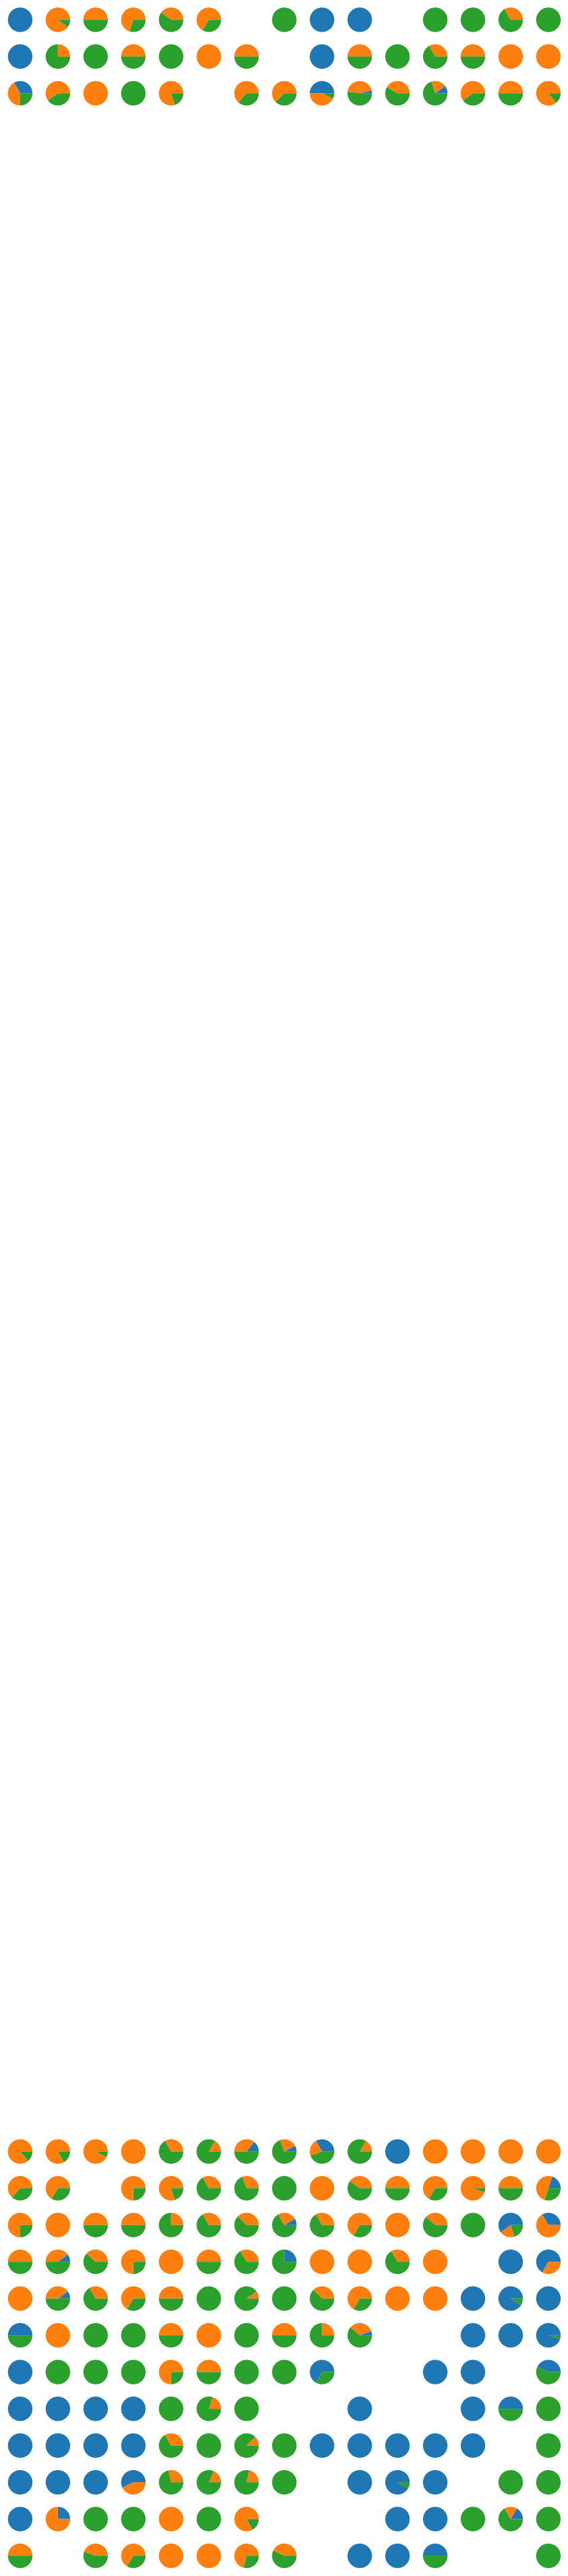

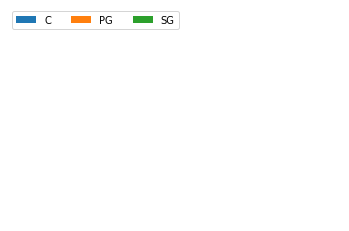

<IPython.core.display.Javascript object>

In [96]:
som_pie_grid(som, X_scale, y)

 [ 300 / 300 ] 100% - 0:00:00 left 
 quantization error: 2.7903711405169935


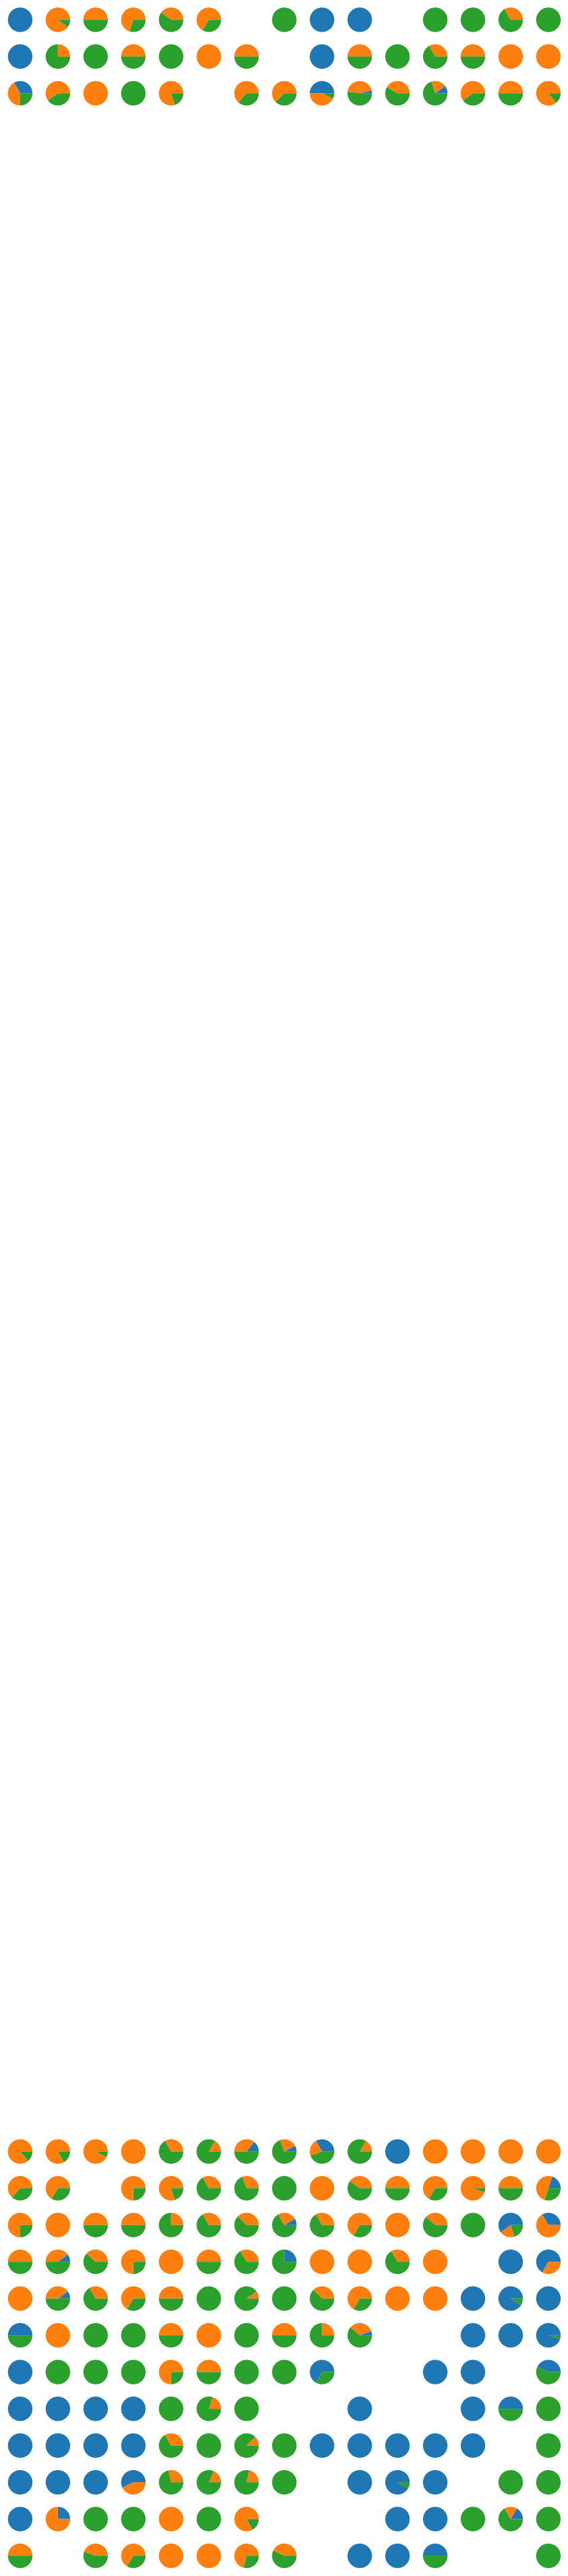

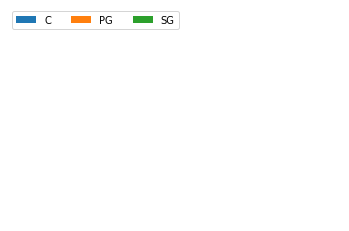

<IPython.core.display.Javascript object>

In [97]:
grid_size = 15

som = MiniSom(x=grid_size, y=grid_size, input_len=X_scale.shape[1], random_seed=55)
som.random_weights_init(X_scale)
som.train_random(X_scale, num_iteration=300, verbose=True)
som_pie_grid(som, X_scale, y)

* Perform dimension reduction (to 2d) with another method (perhaps `PCA` or `TSNE`).
* Create a scatter plot of the results of this dimension reduction and color the scatter plot by the players' positions (the `'Pos'` column).
  * How do these results compare to that of the SOM? What are the pros and cons of the different approaches you took in this notebook?

<AxesSubplot:xlabel='X0', ylabel='X1'>

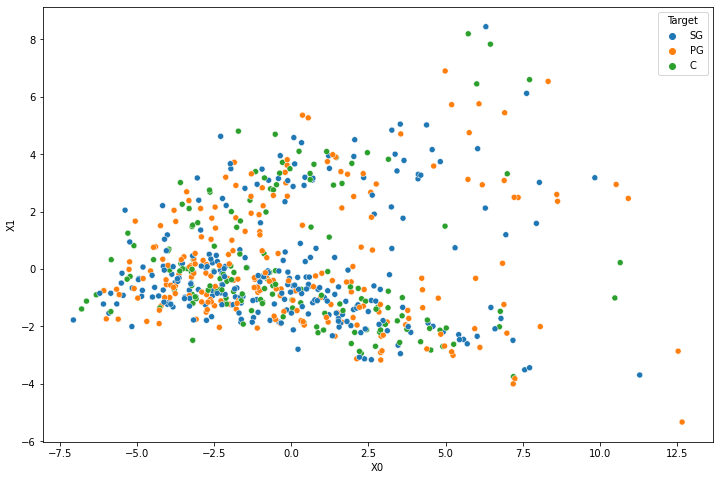

<IPython.core.display.Javascript object>

In [98]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scale), columns=["X0", "X1"])
X_pca["Target"] = y
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_pca, x="X0", y="X1", hue="Target")

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 1154 samples in 0.001s...
[t-SNE] Computed neighbors for 1154 samples in 0.077s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1154
[t-SNE] Computed conditional probabilities for sample 1154 / 1154
[t-SNE] Mean sigma: 1.162259
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.911858
[t-SNE] KL divergence after 1000 iterations: 1.244389


<AxesSubplot:xlabel='X0', ylabel='X1'>

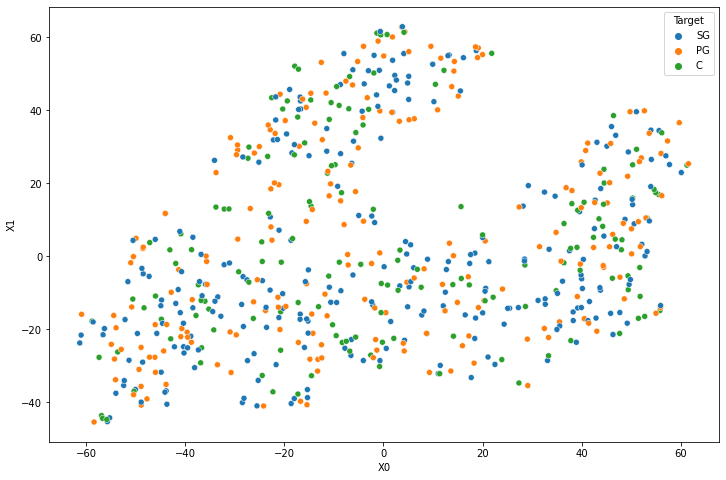

<IPython.core.display.Javascript object>

In [109]:
tsne = TSNE(n_components=2, verbose=1, perplexity=16)
X_tsne = pd.DataFrame(tsne.fit_transform(X_scale), columns=["X0", "X1"])
X_tsne["Target"] = y
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_tsne, x="X0", y="X1", hue="Target")

In [ ]:
# The SOM shows looks like it separates the data best. 
# Based on the plots of the PCA and TSNE results, niether technique show any distinct clusters